# Space-charge-limited current with traps 

This example reproduces Fig. 1.5.1 from PhD thesis https://tel.archives-ouvertes.fr/tel-01286482 .


In [1]:
%matplotlib inline

In [2]:
import matplotlib.pylab as plt
from oedes import *

In [3]:
L = 200e-9
params = {
    'T': 300,
    'electrode0.workfunction': 0,
    'electrode1.workfunction': 0,
    'hole.level': 0,
    'hole.mu': 1e-9,
    'hole.N0': 2.4e26,
    'electrode0.voltage': 0,
    'electrode1.voltage': 0,
    'epsilon_r': 3.,
    'hole.trap.level': -0.45,
    'hole.trap.trate': 1e-22,
    'hole.trap.N0': 6.2e22
}

In [4]:
model = models.std.holeonly(L, traps=['trap'])

trap depth=-10.0 voltage=20.0         

trap depth=0.21 voltage=20.0         

trap depth=0.33 voltage=20.0         

trap depth=0.45 voltage=20.0         

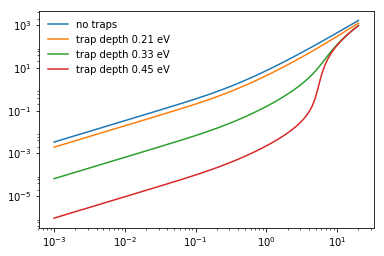

In [5]:
for tdepth in [0.45, 0.33, 0.21, -10.][::-1]:
    params['hole.trap.level'] = -tdepth
    if tdepth < 0:
        label = 'no traps'
    else:
        label = 'trap depth %s eV' % tdepth
    c = context(model)
    sparams = setparam(params, 'electrode0.voltage', 10 **
                       np.linspace(-3, np.log10(20.), 100))
    for u in c.sweep(sparams):
        progress('trap depth=%s voltage=%s' %
                 (tdepth, u.params['electrode0.voltage']))
    v, j = c.teval('electrode0.voltage', 'J')
    plt.plot(v, j, label=label)
    testing.store(j, rtol=1e-3)
plt.xscale('log')
plt.yscale('log')
plt.legend(loc=0, frameon=False)


---
This file is a part of __oedes__, an open source organic electronic device 
simulator. For more information, see <https://www.github.com/mzszym/oedes>.
